In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from more_itertools import flatten
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [16]:
from dhdrnet.util import ROOT_DIR
data_dir = ROOT_DIR / "precomputed_data"

figdir = ROOT_DIR / "figures" / "ev_choices" / "no_fix"
plt.rcParams['figure.figsize'] = (10,10)

In [3]:
df = pd.read_csv(data_dir / "store_perceptual.csv")
df = df.set_index(["name"])
df

,metric,ev1,ev2,score
name,,,,
0006_20160728_123257_859,mse,-6.0,-5.5,21719.742980
0006_20160728_123257_859,ssim,-6.0,-5.5,0.010384
0006_20160728_123257_859,perceptual,-6.0,-5.5,0.923738
0006_20160728_123257_859,mse,-6.0,-5.0,21449.366655
0006_20160728_123257_859,ssim,-6.0,-5.0,0.016527
...,...,...,...,...
33TJ_20150613_095504_183,ssim,4.5,5.5,0.608670
33TJ_20150613_095504_183,perceptual,4.5,5.5,0.421305
33TJ_20150613_095504_183,mse,5.0,5.5,9844.238662


### prepare data, set index to the names, group by metric, clean

In [4]:
bad = df.loc["metric"]
df = df.loc[df.index.difference(bad.index)]

In [5]:
df[["ev1", "ev2"]] = df[["ev1", "ev2"]].astype("float")
evdf = df.copy()
df["ev"] = df[["ev1", "ev2"]].apply(lambda df: tuple(sorted(df)), axis=1)
df = df.drop(["ev1", "ev2"],axis=1)
dfg = df.groupby("metric")

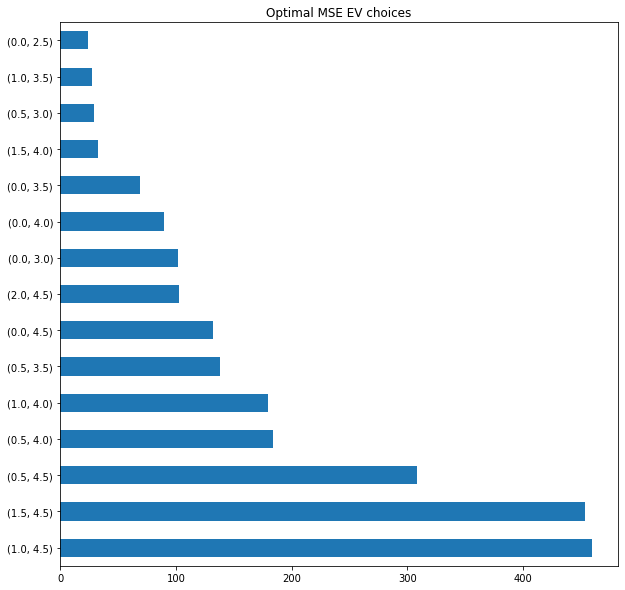

In [17]:
mse_df = dfg.get_group("mse").drop("metric",axis=1)
mse_mins = mse_df.pivot(columns="ev").idxmin(axis=1).apply(lambda f: f[1])
mse_mins.value_counts().iloc[:15].plot.barh(title="Optimal MSE EV choices")
plt.savefig(figdir / "optimal_mse_ev_corrected")

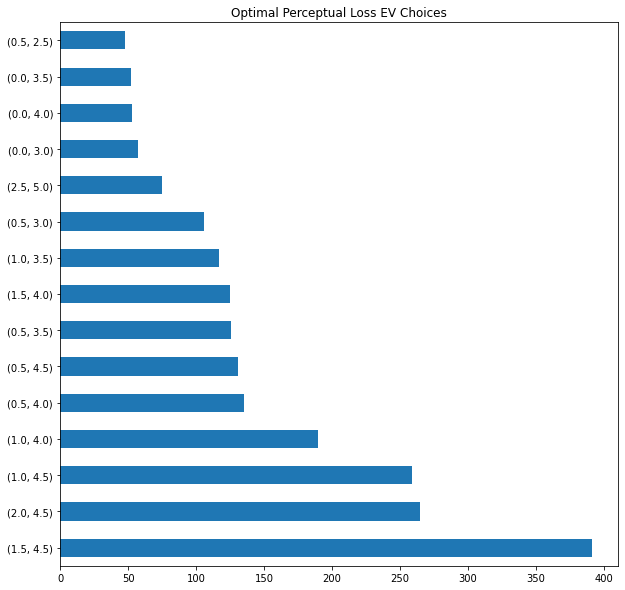

In [18]:
perc_df = dfg.get_group("perceptual").drop(columns="metric")
perc_mins = perc_df.pivot(columns="ev").idxmin(axis=1).apply(lambda f: f[1])
perc_mins.value_counts().iloc[:15].plot.barh(title="Optimal Perceptual Loss EV Choices")
plt.savefig(figdir / "optimal_perceptual_ev_corrected")

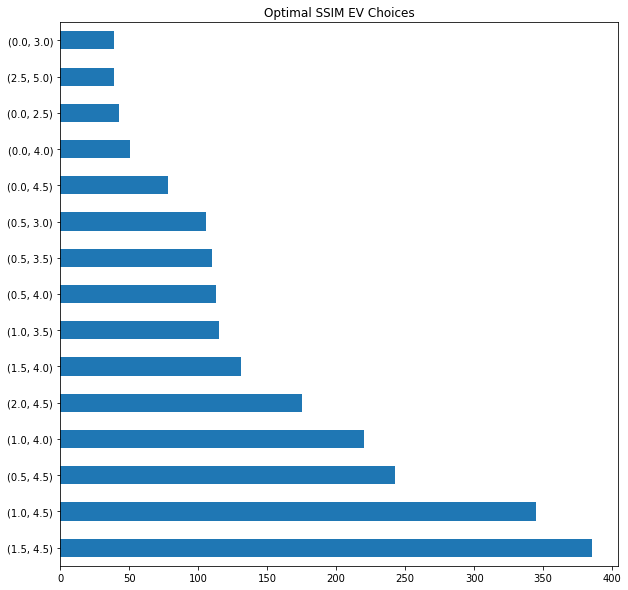

In [19]:
ssim_df = dfg.get_group("ssim").drop(columns="metric")
ssim_maxs = ssim_df.pivot(columns="ev").idxmax(axis=1).apply(lambda f: f[1])
ssim_maxs.value_counts().iloc[:15].plot.barh(title="Optimal SSIM EV Choices")

plt.savefig(figdir / "optimal_ssim_ev_corrected")

# Baseline EV 0 (or what happens to be called EV0)

In [20]:
bdf = evdf[evdf[["ev1", "ev2"]].apply(lambda d: d == 0).any(axis=1)].copy()
bdf["ev"] = bdf.loc[:,["ev1", "ev2"]].apply(lambda df: tuple(sorted(df)), axis=1)
bdf = bdf.drop(columns=["ev1", "ev2"])
bdf

,metric,score,ev
name,,,
0006_20160721_163256_525,mse,4338.172341,"(-6.0, 0.0)"
0006_20160721_163256_525,ssim,0.747697,"(-6.0, 0.0)"
0006_20160721_163256_525,perceptual,0.191361,"(-6.0, 0.0)"
0006_20160721_163256_525,mse,4425.284242,"(-5.5, 0.0)"
0006_20160721_163256_525,ssim,0.743707,"(-5.5, 0.0)"
...,...,...,...
synthetic_ramp_night_motion_blur,ssim,0.975906,"(0.0, 5.0)"
synthetic_ramp_night_motion_blur,perceptual,0.047930,"(0.0, 5.0)"
synthetic_ramp_night_motion_blur,mse,346.047505,"(0.0, 5.5)"


In [21]:
bdfg = bdf.groupby("metric")

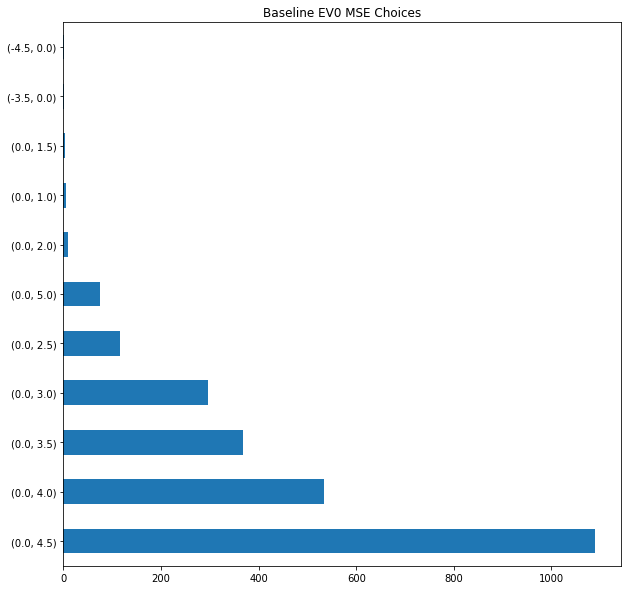

In [22]:
mse_df = bdfg.get_group("mse").drop(columns="metric")
mse_mins = mse_df.pivot(columns="ev").idxmin(axis=1).apply(lambda f: f[1])
mse_mins.value_counts().plot.barh(title="Baseline EV0 MSE Choices")

plt.savefig(figdir / "baseline_mse_ev_corrected")

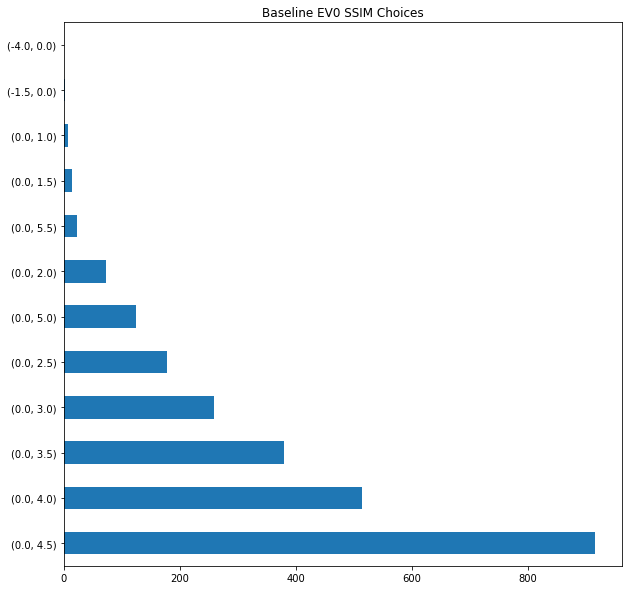

In [23]:
ssim_df = bdfg.get_group("ssim").drop(columns="metric")
ssim_mins = ssim_df.pivot(columns="ev").idxmax(axis=1).apply(lambda f: f[1])
ssim_mins.value_counts().plot.barh(title="Baseline EV0 SSIM Choices")

plt.savefig(figdir / "baseline_ssim_ev_corrected")

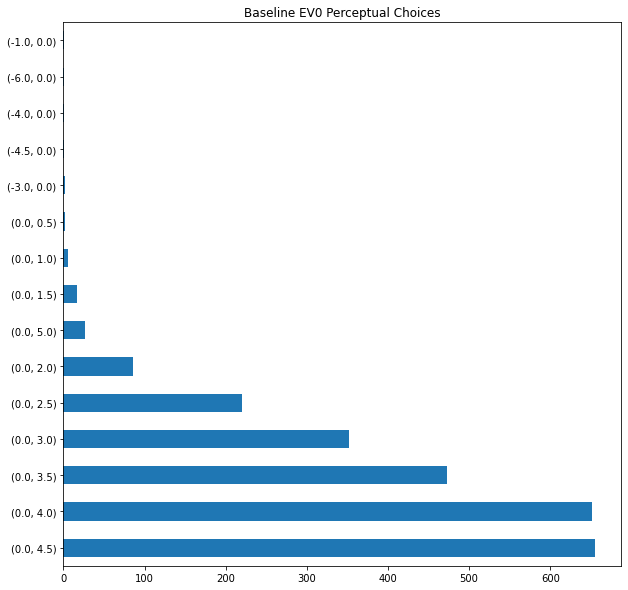

In [24]:
perc_df = bdfg.get_group("perceptual").drop(columns="metric")
perc_mins = perc_df.pivot(columns="ev").idxmin(axis=1).apply(lambda f: f[1])
perc_mins.value_counts().plot.barh(title="Baseline EV0 Perceptual Choices")

plt.savefig(figdir / "baseline_perc_ev_corrected")